In [5]:
import numpy as np
from gensim.models.word2vec import Word2Vec
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.layers import Activation, LSTM, Dense
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import pandas as pd

data = pd.read_csv('17K_Tweet.csv',engine='python',sep = ';')
sentences_training = [doc for doc in data.iloc[:,0]]
data_label = [doc for doc in data.iloc[:,1]]
   
words = []
for i in sentences_training:
    words.append(i.split())

    

In [6]:
for i in range(0, len(data_label)):
  if data_label[i] == "olumlu":
    data_label[i] = 2
  elif data_label[i] == "olumsuz":
    data_label[i] = 0
  elif data_label[i] == "notr" :
    data_label[i] = 1

In [7]:
word2vec_model = Word2Vec(words, size = 200, window = 5, min_count = 1, workers = 16, sample=0.01,  min_alpha=0.0001, negative=0)

token = Tokenizer()
token.fit_on_texts(sentences_training)
x = token.texts_to_sequences(sentences_training)
x = pad_sequences(x)

scaler = StandardScaler()
x = scaler.fit_transform(x)

encode = preprocessing.LabelEncoder()
y = encode.fit_transform(data_label)
y = to_categorical(y)


In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [9]:
model = Sequential()
model.add(word2vec_model.wv.get_keras_embedding(True))
model.add(LSTM(units=128))
model.add(Dense(3, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=128, epochs=25, validation_data=(x_test, y_test))

scores = model.evaluate(x_test, y_test, verbose = 0)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Train on 13830 samples, validate on 3458 samples
Epoch 1/25
13830/13830 [==============================] - 84s 6ms/step - loss: 0.5954 - accuracy: 0.6918 - val_loss: 0.5472 - val_accuracy: 0.7210
Epoch 2/25
13830/13830 [==============================] - 80s 6ms/step - loss: 0.5174 - accuracy: 0.7360 - val_loss: 0.5323 - val_accuracy: 0.7279
Epoch 3/25
13830/13830 [==============================] - 82s 6ms/step - loss: 0.5078 - accuracy: 0.7391 - val_loss: 0.5194 - val_accuracy: 0.7329
Epoch 4/25
13830/13830 [==============================] - 77s 6ms/step - loss: 0.5033 - accuracy: 0.7418 - val_loss: 0.5143 - val_accuracy: 0.7328
Epoch 5/25
13830/13830 [==============================] - 78s 6ms/step - loss: 0.4973 - accuracy: 0.7448 - val_loss: 0.5114 - val_accuracy: 0.7344
Epoch 6/25
13830/13830 [==============================] - 79s 6ms/step - loss: 0.4945 - accuracy: 0.7468 - val_loss: 0.5100 - val_accuracy: 0.7367
Epoch 7/25
13830/13830 [==============================] - 78s 6ms/ste

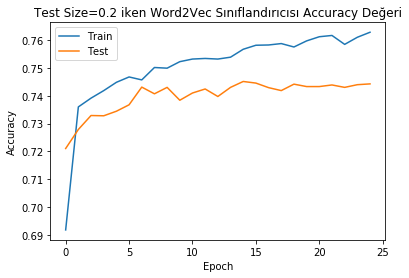

In [10]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Test Size=0.2 iken Word2Vec Sınıflandırıcısı Accuracy Değeri')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

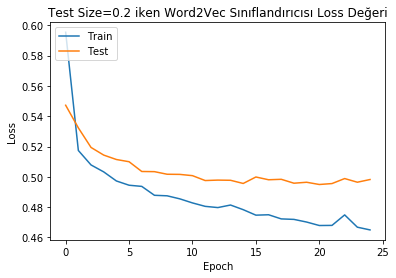

In [12]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Test Size=0.2 iken Word2Vec Sınıflandırıcısı Loss Değeri')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5, random_state = 0)

In [15]:
model = Sequential()
model.add(word2vec_model.wv.get_keras_embedding(True))
model.add(LSTM(units=128))
model.add(Dense(3, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=128, epochs=25, validation_data=(x_test, y_test))

scores = model.evaluate(x_test, y_test, verbose = 0)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Train on 8644 samples, validate on 8644 samples
Epoch 1/25
8644/8644 [==============================] - 64s 7ms/step - loss: 0.6277 - accuracy: 0.6709 - val_loss: 0.5918 - val_accuracy: 0.7003
Epoch 2/25
8644/8644 [==============================] - 61s 7ms/step - loss: 0.5410 - accuracy: 0.7256 - val_loss: 0.5305 - val_accuracy: 0.7281
Epoch 3/25
8644/8644 [==============================] - 59s 7ms/step - loss: 0.5096 - accuracy: 0.7383 - val_loss: 0.5218 - val_accuracy: 0.7331
Epoch 4/25
8644/8644 [==============================] - 57s 7ms/step - loss: 0.4994 - accuracy: 0.7439 - val_loss: 0.5162 - val_accuracy: 0.7348
Epoch 5/25
8644/8644 [==============================] - 76s 9ms/step - loss: 0.4960 - accuracy: 0.7438 - val_loss: 0.5159 - val_accuracy: 0.7343
Epoch 6/25
8644/8644 [==============================] - 109s 13ms/step - loss: 0.4941 - accuracy: 0.7464 - val_loss: 0.5089 - val_accuracy: 0.7389
Epoch 7/25
8644/8644 [==============================] - 104s 12ms/step - loss: 0

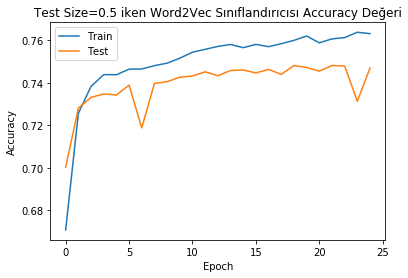

In [16]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Test Size=0.5 iken Word2Vec Sınıflandırıcısı Accuracy Değeri')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

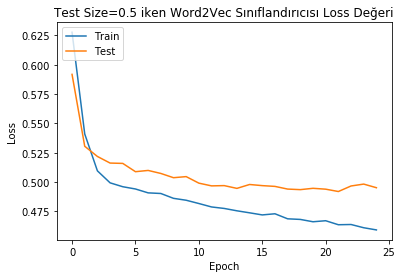

In [17]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Test Size=0.5 iken Word2Vec Sınıflandırıcısı Loss Değeri')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.7, random_state = 0)

In [20]:
model = Sequential()
model.add(word2vec_model.wv.get_keras_embedding(True))
model.add(LSTM(units=128))
model.add(Dense(3, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=128, epochs=25, validation_data=(x_test, y_test))

scores = model.evaluate(x_test, y_test, verbose = 0)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Train on 5186 samples, validate on 12102 samples
Epoch 1/25
5186/5186 [==============================] - 39s 8ms/step - loss: 0.6367 - accuracy: 0.6620 - val_loss: 0.6204 - val_accuracy: 0.6667
Epoch 2/25
5186/5186 [==============================] - 36s 7ms/step - loss: 0.5897 - accuracy: 0.6957 - val_loss: 0.5641 - val_accuracy: 0.7156
Epoch 3/25
5186/5186 [==============================] - 35s 7ms/step - loss: 0.5398 - accuracy: 0.7266 - val_loss: 0.5280 - val_accuracy: 0.7324
Epoch 4/25
5186/5186 [==============================] - 35s 7ms/step - loss: 0.5169 - accuracy: 0.7363 - val_loss: 0.5206 - val_accuracy: 0.7347
Epoch 5/25
5186/5186 [==============================] - 36s 7ms/step - loss: 0.5099 - accuracy: 0.7398 - val_loss: 0.5151 - val_accuracy: 0.7348
Epoch 6/25
5186/5186 [==============================] - 35s 7ms/step - loss: 0.5028 - accuracy: 0.7420 - val_loss: 0.5214 - val_accuracy: 0.7325
Epoch 7/25
5186/5186 [==============================] - 35s 7ms/step - loss: 0.50

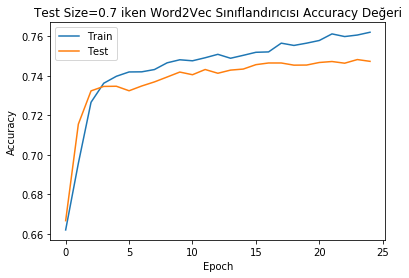

In [21]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Test Size=0.7 iken Word2Vec Sınıflandırıcısı Accuracy Değeri')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

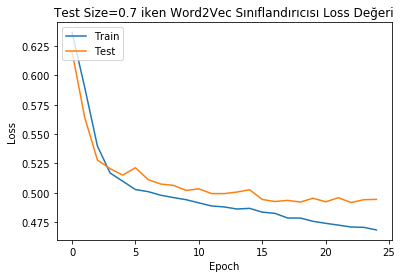

In [23]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Test Size=0.7 iken Word2Vec Sınıflandırıcısı Loss Değeri')
plt.legend(['Train','Test'], loc='upper left')
plt.show()